# Linear and Logistic Regression 

This Jupyter Notebook accompanies the blog posts on Linear and Logistic Regression

First of all we will begin by importing the libraries we will need. 
__Numpy__ is a linear algebra library in Python and we will be using it to do all of the matrix and vector computations in our code.
__Pandas__ is used to import our data and clean it up before we pass it to our machine learning algorithms.
__Matplotlib__ will allow us to visualise the training process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, to import the data - for linear regression. the dataset is on Housing Prices in Boston, sourced from Kaggle <a href="https://www.kaggle.com/c/boston-housing"> here </a>. This explains which features the abbreviated columns look at. 
<br>
For the purposes of the tutorial, we will split the train.csv file provided by Kaggle into our own train and test set, since the test.csv file doesn't have any labels.
<br>**EXTENSION**: run the algorithms on the test.csv (provided in this repo) and submit your predictions to Kaggle!

In [2]:
house_dataset = pd.read_csv("boston-housing-dataset/train.csv")
house_dataset.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Next to clean up into the format we want:
    X = _n x m_ matrix, Y = _1 x m _ matrix.
<br> We can remove the ID column, since it is not a feature. We will shuffle the data, normalise it and then split it into train:test in an 80:20 split, and then separate the input features from the labels.

In [3]:
house_dataset.drop("ID", axis=1, inplace=True)
house_dataset = house_dataset.reindex(np.random.permutation(house_dataset.index))

#normalise the input features - this ensures they are all in the same range 0-1. 
house_dataset.loc[:, house_dataset.columns!="medv"] -= house_dataset.loc[:, house_dataset.columns!="medv"].mean()
house_dataset.loc[:, house_dataset.columns!="medv"] /= house_dataset.loc[:, house_dataset.columns!="medv"].std()

#transpose to get correct dimensions
X_lin_train = house_dataset.loc[:house_dataset.shape[0]*4//5, house_dataset.columns!="medv"].as_matrix().T 
Y_lin_train = house_dataset.loc[:house_dataset.shape[0]*4//5, ["medv"]].as_matrix().T

X_lin_test = house_dataset.loc[house_dataset.shape[0]*4//5:, house_dataset.columns!="medv"].as_matrix().T 
Y_lin_test = house_dataset.loc[house_dataset.shape[0]*4//5:, ["medv"]].as_matrix().T


Now to load the breast cancer dataset - again this is from <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">Kaggle</a> (though originally from UCI). To contrast with the other dataset, this dataset has features which seem hard to interpret on their own, unlike with housing prices where we can intuitively make sense of the features - e.g more rooms implies higher price. 
<br> This is where the power of machine learning comes in - to spot patterns in the data not possible by humans.

In [4]:
cancer_dataset = pd.read_csv("breast-cancer-dataset/data.csv")
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now to clean up the data - remove the id, and convert the label from M/B to 1/0, as well as normalise the data and shuffle.

In [5]:
cancer_dataset.drop(["id",'Unnamed: 32'], axis=1, inplace=True)
cancer_dataset["diagnosis"] = cancer_dataset["diagnosis"].apply(lambda x: 1 if (x=="M") else 0)

#shuffle data
cancer_dataset = cancer_dataset.reindex(np.random.permutation(cancer_dataset.index))

#normalise the input features - this ensures they are all in the same range 0-1. 
cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"] -= cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"].mean()
cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"] /= cancer_dataset.loc[:, cancer_dataset.columns!="diagnosis"].std()



In [6]:
X_log_train = cancer_dataset.loc[:cancer_dataset.shape[0]*4//5, cancer_dataset.columns!="diagnosis"].as_matrix().T 
Y_log_train = cancer_dataset.loc[:cancer_dataset.shape[0]*4//5, ["diagnosis"]].as_matrix().T 

X_log_test = cancer_dataset.loc[cancer_dataset.shape[0]*4//5:, cancer_dataset.columns!="diagnosis"].as_matrix().T 
Y_log_test = cancer_dataset.loc[cancer_dataset.shape[0]*4//5:, ["diagnosis"]].as_matrix().T 

Next we initialise the weights and biases

In [7]:
W_lin = np.random.randn(Y_lin_train.shape[0], X_lin_train.shape[0])
b_lin = np.random.randn(Y_lin_train.shape[0],1)

W_log = np.random.randn(Y_log_train.shape[0], X_log_train.shape[0])
b_log = np.random.randn(Y_log_train.shape[0],1)


In [8]:
Y_log_test.shape

(1, 367)

Now we code up the equations for the forward step:
    $$ \hat{Y}_{lin} = WX+b$$
    $$ \hat{Y}_{log} = \sigma(WX+b)$$

In [9]:
def forward_lin(X, W, b):
    return np.dot(W,X)+b

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def forward_log(X,W,b):
    return sigmoid(forward_lin(X,W,b))

Let's look at some sample predictions from the network.

In [10]:
pd.DataFrame({"predictions":forward_lin(X_lin_train[:,:3],W_lin,b_lin)[0] , "Y": Y_lin_train[:,:3][0] }).head()

,Y,predictions
0,50.0,-0.150518
1,16.5,2.665321
2,19.1,2.376511


In [11]:
pd.DataFrame({"predictions":forward_log(X_log_train[:,:5],W_log,b_log)[0] , "Y": Y_log_train[:,:5][0] }).head()

,Y,predictions
0,0,0.998004
1,0,0.933207
2,0,0.995197
3,0,0.215260
4,0,0.994377


Not very good! So let's train the model:

First - the loss functions need to be defined: these are

$$ J(W,b) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)}_{pred} - y^{(i)})^2 $$


$$ J(W,b) = \frac{-1}{m} \sum_{i=1}^{m} y^{(i)} \log(y^{(i)}_{pred}) + (1-y^{(i)}) \log(1-y^{(i)}_{pred})$$



In [12]:
def MSE_loss(Y, Y_pred):
    return (1.0/(2*Y.shape[1]))*np.sum(np.square(Y-Y_pred))
                                      

def log_loss(Y, Y_pred):
    return (-1.0/(Y.shape[1]))*np.sum(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
    

In [13]:
MSE_loss(Y_lin_train,forward_lin(X_lin_train,W_lin,b_lin))

342.3541544583448

Now, to compute the gradients, note that they are actually the same for both linear and logistic regression:
$$\frac{\partial{J}}{\partial{W}} =  \frac{1}{m} \sum_{i=1}^{m} x^{(i)}(y^{(i)}_{pred} - y^{(i)})$$
$$\frac{\partial{J}}{\partial{b}} =  \frac{1}{m} \sum_{i=1}^{m}(y^{(i)}_{pred} - y^{(i)}) $$




In [14]:
def grads(X, Y, Y_pred):
    dW = (1.0/(Y.shape[1]))*np.dot(Y_pred-Y,X.T)
    db = np.mean((Y_pred-Y),axis=1,keepdims=True)
    return dW, db

In [15]:
def gradient_descent_lin(X, W, b, Y, alpha=1e-2, iterations=500):
    MSE_losses = []
    for i in range(iterations):
        Y_pred = forward_lin(X, W, b)
        MSE_losses.append(MSE_loss(Y,Y_pred))
        if(i%50==0):
            print("Iteration {}: Loss={}".format(i, MSE_losses[i]))
        dW, db = grads(X, Y, Y_pred)
        W = W -  alpha*dW
        b = b - alpha*db
    plt.plot(range(iterations),MSE_losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return W, b


def gradient_descent_log(X, W, b, Y, alpha=3e-2, iterations=1000):
    log_losses = []
    for i in range(iterations):
        Y_pred = forward_log(X, W, b)
        log_losses.append(log_loss(Y, Y_pred))
        if(i%50==0):
            print("Iteration {}: Loss={}".format(i, log_losses[i]))
        dW, db = grads(X, Y, Y_pred)
        W = W -  alpha*dW
        b = b - alpha*db
    #plot the learning curve
    plt.plot(range(iterations),log_losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return W, b

Let's run gradient descent on our training dataset:

Iteration 0: Loss=342.3541544583448
Iteration 50: Loss=121.93439767824898
Iteration 100: Loss=53.846512077548276
Iteration 150: Loss=29.795968220984943
Iteration 200: Loss=20.860325290303052
Iteration 250: Loss=17.39177527472829
Iteration 300: Loss=15.969941733782955
Iteration 350: Loss=15.3389109971772
Iteration 400: Loss=15.025940377382025
Iteration 450: Loss=14.848681468122702


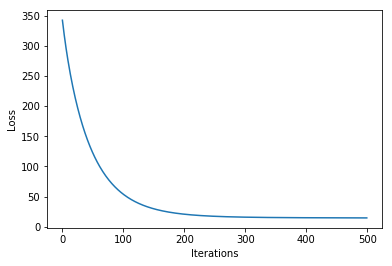

In [16]:
W_lin, b_lin = gradient_descent_lin(X_lin_train, W_lin, b_lin, Y_lin_train )

Iteration 0: Loss=3.6538891900624355
Iteration 50: Loss=0.6978207345650701
Iteration 100: Loss=0.36665946810803884
Iteration 150: Loss=0.2534189467137447
Iteration 200: Loss=0.2014255167001032
Iteration 250: Loss=nan
Iteration 300: Loss=nan
Iteration 350: Loss=nan
Iteration 400: Loss=nan
Iteration 450: Loss=nan
Iteration 500: Loss=nan
Iteration 550: Loss=nan
Iteration 600: Loss=nan
Iteration 650: Loss=nan
Iteration 700: Loss=nan
Iteration 750: Loss=nan
Iteration 800: Loss=nan
Iteration 850: Loss=nan
Iteration 900: Loss=nan
Iteration 950: Loss=nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


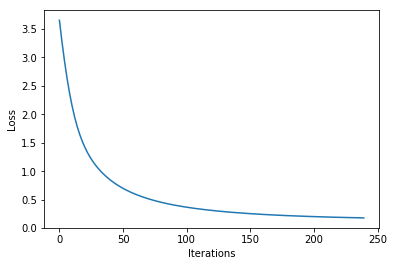

In [17]:
W_log, b_log = gradient_descent_log(X_log_train, W_log,b_log, Y_log_train)

Finally, we can test our trained algorithms on the test set:
For the logistic regression algorithm, we can measure its performance with accuracy, for linear regression we use MSE.
**EXTENSION** Look at the F1 metric instead of accuracy 

In [18]:
MSE_loss(Y_lin_test, forward_lin(X_lin_test,W_lin,b_lin))

12.720477887308476

In [19]:
def accuracy(Y,Y_pred):
    return np.mean(np.abs(np.round(Y_pred)-Y))

In [20]:
accuracy(Y_log_test, forward_log(X_log_test,W_log,b_log))

0.043596730245231606

Accuracy is not a good metric when the dataset is skewed, instead we look at another metric called the F1 Score (ranges between 0 and 1) - higher is better. Using this, it turns out our logistic regression model's performance is pretty good!

In [21]:
def F1_Score(AL, Y):
    prediction = (AL >= (np.ones_like(AL)/2))
    
    truth_pos = (Y == np.ones_like(Y))
    truth_neg = (Y == np.zeros_like(Y))
    pred_pos = (prediction == np.ones_like(prediction))
    pred_neg = (prediction == np.zeros_like(prediction))

    true_pos = np.sum(np.logical_and(truth_pos,pred_pos))
    if true_pos == 0: #This prevents an undefined computation since precision=recall=0 
        return 0
    false_pos =np.sum(np.logical_and(truth_neg,pred_pos))
    false_neg =np.sum(np.logical_and(truth_pos,pred_neg))
    true_neg =np.sum(np.logical_and(truth_neg,pred_neg))

    precision = true_pos/(true_pos + false_pos)
    recall = (true_pos)/(true_pos + false_neg)
    F1_score = 2*(recall*precision) /(recall + precision)
    return F1_score 

In [22]:
F1_Score(forward_log(X_log_test,W_log,b_log),Y_log_test)

0.9416058394160584